In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bike.csv",parse_dates=["date"])

In [3]:
df.head(10)

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000


In [4]:
df.shape

(191, 5)

In [5]:
df.dtypes

date           datetime64[ns]
temperature           float64
humidity              float64
windspeed             float64
count                 float64
dtype: object

In [6]:
df.columns

Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [7]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [8]:
df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

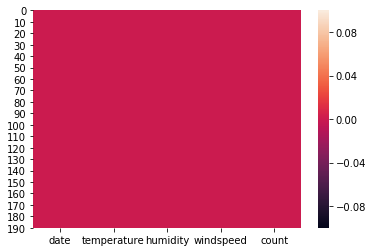

In [9]:
sns.heatmap(df.isnull())

In [10]:
df_dates=pd.DataFrame()
df_dates["day"]=df["date"].dt.day_name()
df_dates["year"]=df["date"].dt.year
df_dates["month"]=df["date"].dt.month_name()
df_dates["count"]=df["count"]

In [11]:
df_dates["type_of_day"]=np.where((df_dates["day"]=="Sunday")|(df_dates["day"]=="Saturday"),"weekend","weekday")


In [12]:
df_dates

,day,year,month,count,type_of_day
0,Monday,2011,January,120.000000,weekday
1,Tuesday,2011,January,108.000000,weekday
2,Wednesday,2011,January,82.000000,weekday
3,Thursday,2011,January,88.000000,weekday
4,Friday,2011,January,148.000000,weekday
...,...,...,...,...,...
186,Friday,2011,July,692.000000,weekday
187,Saturday,2011,July,702.333333,weekend
188,Sunday,2011,July,712.666667,weekend
189,Monday,2011,July,723.000000,weekday


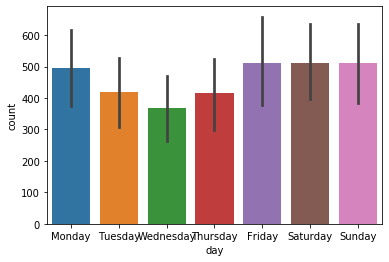

In [13]:
sns.barplot(x="day",y="count",data=df_dates)
plt.show()

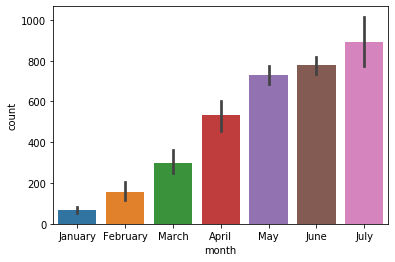

In [14]:
sns.barplot(x="month",y="count",data=df_dates)
plt.show()

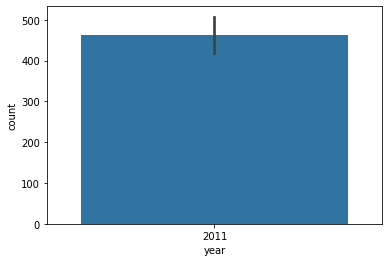

In [15]:
sns.barplot(x="year",y="count",data=df_dates)
plt.show()

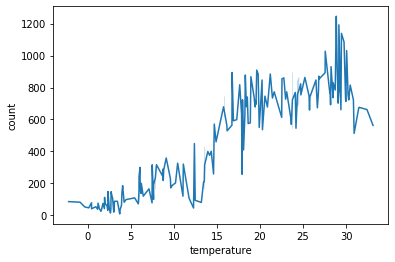

In [16]:
sns.lineplot(x="temperature",y="count",data=df)

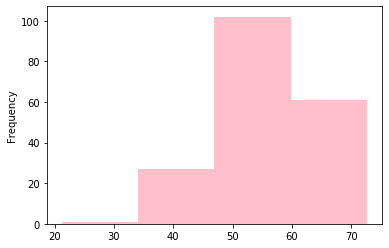

In [17]:
df['humidity'].plot.hist(color="pink",bins=4)

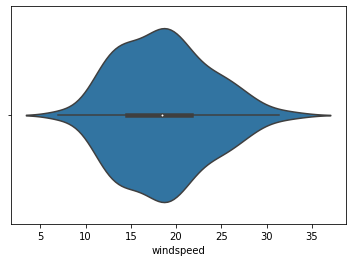

In [18]:
sns.violinplot(x="windspeed",data=df)

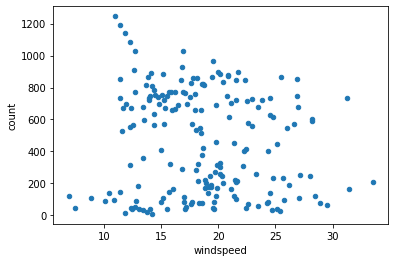

In [19]:
df.plot.scatter('windspeed','count')

In [20]:
df.groupby('humidity')['count'].mean()

humidity
21.300000     46.0
38.172029    222.0
38.329820    736.0
38.841664    317.0
38.851770    140.0
             ...  
69.458098     34.0
69.504609    692.0
69.876864    536.0
70.232201     81.0
72.575560    179.0
Name: count, Length: 188, dtype: float64

In [21]:
df.corr()

,temperature,humidity,windspeed,count
temperature,1.000000,0.152391,-0.058493,0.897247
humidity,0.152391,1.000000,-0.119008,0.044918
windspeed,-0.058493,-0.119008,1.000000,-0.130064
count,0.897247,0.044918,-0.130064,1.000000


In [22]:
dfcor=df.corr()

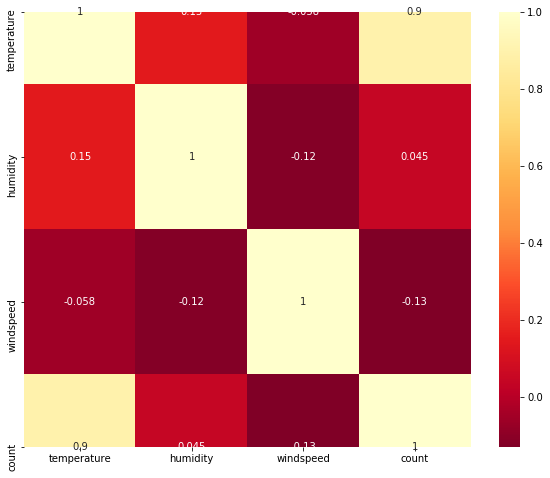

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [24]:
df.drop('date',axis=1,inplace=True)

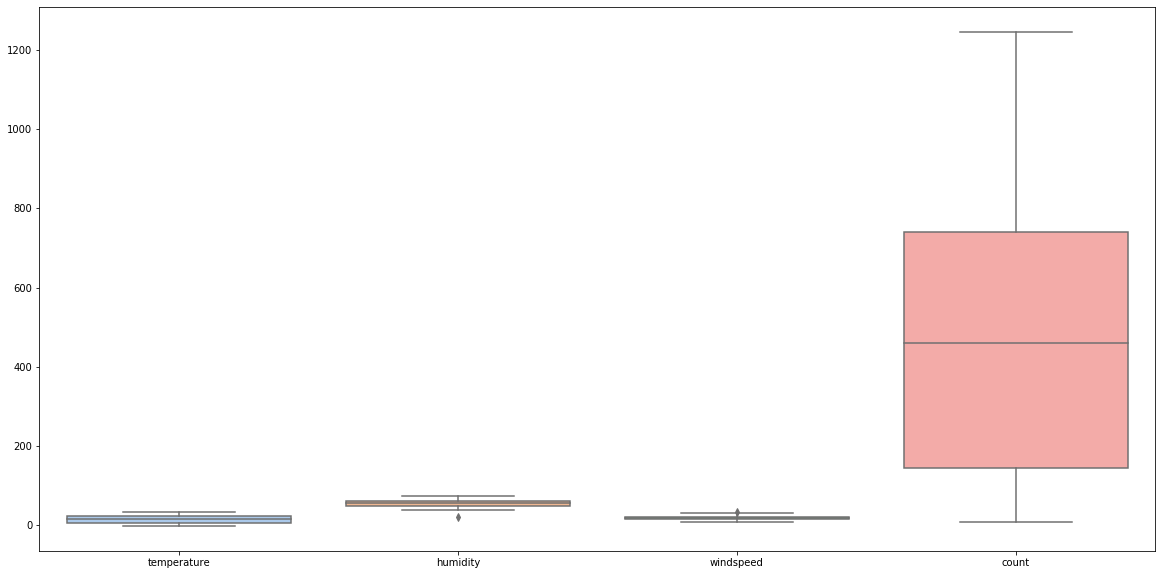

In [25]:
plt.figure(figsize = (20, 10))
sns.boxplot(data=df, palette ='pastel')

In [26]:
columns_target=['count']
columns_train=['windspeed','humidity','temperature']
df_x=df[columns_train]
y=df[columns_target]

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)


In [28]:
x.skew()

windspeed      0.341381
humidity      -0.417698
temperature    0.053735
dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=51)

In [30]:
x.shape

(191, 3)

In [31]:
y.shape

(191, 1)

In [32]:
x_train.shape

(127, 3)

In [33]:
y_train.shape

(127, 1)

In [34]:
x_test.shape

(64, 3)

In [35]:
y_test.shape

(64, 1)

In [36]:
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lr.coef_

array([[-44.61520428, -34.66899901, 290.61260249]])

In [39]:
lr.intercept_

array([458.2513474])

In [40]:
lr.score(x_train,y_train)

0.8015286923270795

In [41]:
pred=lr.predict(x_test)
print("Predicted count:",pred)
print("actual count",y_test)

Predicted count: [[ 43.57023188]
 [219.99274306]
 [348.66564221]
 [ 41.97675871]
 [  2.55971381]
 [432.20957922]
 [850.602374  ]
 [299.37177898]
 [781.16978638]
 [408.60871197]
 [ 16.64868674]
 [341.00470773]
 [621.58543231]
 [139.56430218]
 [587.20981383]
 [ 97.28178449]
 [649.20360441]
 [781.86963472]
 [  2.96169854]
 [329.47960602]
 [266.49709323]
 [149.94504627]
 [ 71.42241019]
 [332.06246635]
 [741.85005128]
 [851.59585731]
 [447.74754347]
 [ 99.68108586]
 [531.13146263]
 [188.82667453]
 [978.68774133]
 [ 83.27511253]
 [660.52403326]
 [235.88308577]
 [269.45890143]
 [507.15814413]
 [449.92539181]
 [860.21905701]
 [667.73129336]
 [  4.31219927]
 [166.06866862]
 [ 88.62349197]
 [662.63180327]
 [185.45017795]
 [751.16626767]
 [671.33182696]
 [444.46097465]
 [990.0346984 ]
 [113.28018179]
 [275.02390101]
 [208.7294826 ]
 [778.10082552]
 [644.35769805]
 [238.20303041]
 [ 82.3862923 ]
 [956.96629884]
 [242.02228536]
 [863.85707952]
 [597.17381782]
 [572.27812471]
 [ 94.88248312]
 [457.0

In [42]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8549872155637446


In [43]:
lr.score(x_test,y_test)

0.8549872155637446

In [44]:
#finalising model at random state 88 to improve accuracy
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=88)

In [45]:
lr.score(x_test,y_test)

0.9143055467184564

In [46]:
pred=lr.predict(x_test)
print("Predicted count:",pred)
print("actual count",y_test)

Predicted count: [[174.96976993]
 [ 99.68108586]
 [224.98020535]
 [164.84090855]
 [299.37177898]
 [184.94130574]
 [431.39287335]
 [868.23955363]
 [611.23444611]
 [824.92096487]
 [112.05742465]
 [595.21684834]
 [187.65862761]
 [781.15111887]
 [302.81312659]
 [852.1969677 ]
 [776.95402164]
 [186.03970997]
 [ 97.28178449]
 [621.58543231]
 [857.84057679]
 [523.67899563]
 [105.03773818]
 [792.232891  ]
 [185.45017795]
 [200.53207956]
 [219.99274306]
 [826.62916586]
 [126.20721743]
 [628.19136284]
 [949.94352332]
 [149.94504627]
 [741.85005128]
 [  4.31219927]
 [311.84477161]
 [332.06246635]
 [203.40112975]
 [ 94.88248312]
 [221.32733491]]
actual count           count
22   186.000000
13    31.500000
95   172.000000
39   149.000000
121  255.000000
52   100.000000
76   562.000000
150  736.000000
115  569.000000
171  746.000000
87   179.000000
105  669.000000
2     82.000000
160  847.000000
85   317.000000
155  763.000000
163  769.000000
60   214.000000
14    20.250000
113  678.000000
173  930.

In [47]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 76.52219343158858
Root Mean Squared Error: 91.41881423996522


In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9143055467184564


In [51]:
from sklearn.externals import joblib
joblib.dump(lr,'lrbike.obj')
lr_from_joblib=joblib.load('lrbike.obj')